Homework 2. EDUARDO GALEOTE ESCALERA A20552496

Final F1 Score (Regular GD): 0.8333333333333334
Confusion Matrix (Regular GD):
[[3 1]
 [1 5]]

Final F1 Score (Stochastic GD): 0.923076923076923
Confusion Matrix (Stochastic GD):
[[3 1]
 [0 6]]
Total time for Regular GD: 1.3903090953826904
Total time for Stochastic GD: 1.0694069862365723


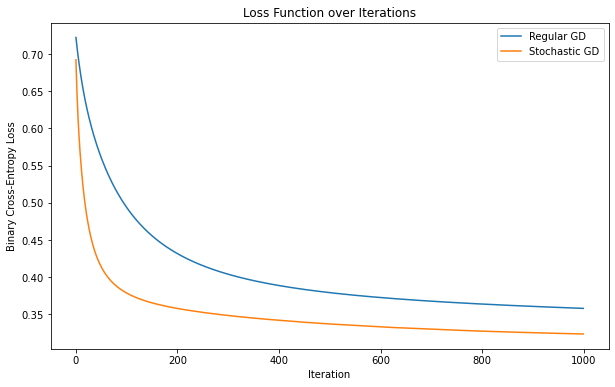

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import time

# Function to perform sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute binary cross-entropy loss
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Function to perform gradient descent optimization
def gradient_descent(X, y, weights, learning_rate):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / m
    weights -= learning_rate * gradient
    return weights, binary_cross_entropy_loss(y, predictions)

# Function to perform stochastic gradient descent optimization
def stochastic_gradient_descent(X, y, weights, learning_rate, batch_size):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices)
    
    for i in range(0, m, batch_size):
        batch_indices = indices[i:i + batch_size]
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        predictions = sigmoid(np.dot(X_batch, weights))
        gradient = np.dot(X_batch.T, (predictions - y_batch)) / batch_size
        weights -= learning_rate * gradient

    return weights, binary_cross_entropy_loss(y, sigmoid(np.dot(X, weights)))

# Function to evaluate F1 score and confusion matrix
def evaluate_model(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    y_pred = (predictions >= 0.5).astype(int)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return f1, cm

# Generate the dataset
X1 = np.array([1, 4, 2.5, 5, 0, 2.3, 5, 1.4, 1.2, 3.9])
X2 = np.array([0.5, 2, 4, 0.8, 1.5, 4, 2, 3, 5.2, 4.6])
X_bias = np.vstack([np.ones_like(X1), X1, X2]).T
y = np.array(['Green', 'Orange', 'Orange', 'Red', 'Green', 'Green', 'Orange', 'Green', 'Green', 'Green'])

# Map class labels to 0 and 1
y_binary = (y == 'Green').astype(int)

# Set initial weights
initial_weights = np.array([0.1, 0.1, 0.1])

# Set hyperparameters
learning_rate = 0.01
batch_size = 2
iterations = 1000

# Lists to store loss and F1 score for each iteration
gd_loss_history = []
sgd_loss_history = []
f1_history = []

# Lists to store time taken for each iteration
gd_time_history = []
sgd_time_history = []

# Regular Gradient Descent
weights_gd = initial_weights.copy()
start_time = time.time()
for _ in range(iterations):
    weights_gd, loss = gradient_descent(X_bias, y_binary, weights_gd, learning_rate)
    f1, _ = evaluate_model(X_bias, y_binary, weights_gd)
    gd_loss_history.append(loss)
    f1_history.append(f1)
    gd_time_history.append(time.time() - start_time)

# Stochastic Gradient Descent
weights_sgd = initial_weights.copy()
start_time = time.time()
for _ in range(iterations):
    weights_sgd, loss = stochastic_gradient_descent(X_bias, y_binary, weights_sgd, learning_rate, batch_size)
    f1, _ = evaluate_model(X_bias, y_binary, weights_sgd)
    sgd_loss_history.append(loss)
    sgd_time_history.append(time.time() - start_time)

# Print F1 score and confusion matrix for the last step
final_f1_gd, confusion_matrix_gd = evaluate_model(X_bias, y_binary, weights_gd)
final_f1_sgd, confusion_matrix_sgd = evaluate_model(X_bias, y_binary, weights_sgd)

print("Final F1 Score (Regular GD):", final_f1_gd)
print("Confusion Matrix (Regular GD):")
print(confusion_matrix_gd)

print("\nFinal F1 Score (Stochastic GD):", final_f1_sgd)
print("Confusion Matrix (Stochastic GD):")
print(confusion_matrix_sgd)

# Print the total time taken
print("Total time for Regular GD:", gd_time_history[-1])
print("Total time for Stochastic GD:", sgd_time_history[-1])

# Plot loss function over each step for GD and SGD
plt.figure(figsize=(10, 6))
plt.plot(gd_loss_history, label='Regular GD')
plt.plot(sgd_loss_history, label='Stochastic GD')
plt.title('Loss Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.show()


The orange optimizer(SGD) learns quicker than regular GD. Time wise, SGD was faster.

Softmax regression

Final F1 Score (Regular GD): 0.8938461538461538
Confusion Matrix (Regular GD):
[[6 0 0]
 [1 2 0]
 [0 0 1]]

Final F1 Score (Stochastic GD): 0.8
Confusion Matrix (Stochastic GD):
[[5 1 0]
 [1 2 0]
 [0 0 1]]
Total time for Regular GD: 1.3157720565795898
Total time for Stochastic GD: 1.35788893699646


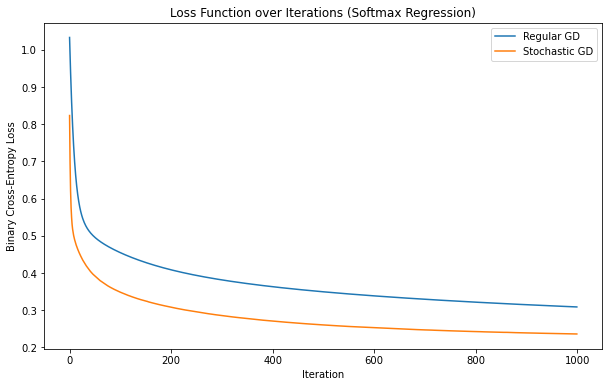

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import time

# Function to perform softmax activation
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Function to compute categorical cross-entropy loss
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Function to perform gradient descent optimization for softmax regression
def softmax_gradient_descent(X, y, weights, learning_rate):
    m = len(y)
    predictions = softmax(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / m
    weights -= learning_rate * gradient
    return weights, binary_cross_entropy_loss(y, predictions)

# Function to perform stochastic gradient descent optimization for softmax regression
def softmax_stochastic_gradient_descent(X, y, weights, learning_rate, batch_size):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices)
    
    for i in range(0, m, batch_size):
        batch_indices = indices[i:i + batch_size]
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        predictions = softmax(np.dot(X_batch, weights))
        gradient = np.dot(X_batch.T, (predictions - y_batch)) / batch_size
        weights -= learning_rate * gradient

    return weights, binary_cross_entropy_loss(y, softmax(np.dot(X, weights)))

# Function to evaluate F1 score and confusion matrix for softmax regression
def evaluate_softmax_model(X, y, weights):
    predictions = softmax(np.dot(X, weights))
    y_pred = np.argmax(predictions, axis=1)
    f1 = f1_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred)
    return f1, cm

# Generate the dataset
X1 = np.array([1, 4, 2.5, 5, 0, 2.3, 5, 1.4, 1.2, 3.9])
X2 = np.array([0.5, 2, 4, 0.8, 1.5, 4, 2, 3, 5.2, 4.6])
X_bias = np.vstack([np.ones_like(X1), X1, X2]).T
y = np.array(['Green', 'Orange', 'Orange', 'Red', 'Green', 'Green', 'Orange', 'Green', 'Green', 'Green'])

# Map class labels to numerical values
label_mapping = {'Green': 0, 'Orange': 1, 'Red': 2}
y_encoded = np.array([label_mapping[label] for label in y])

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False, categories='auto')
y_onehot = encoder.fit_transform(y_encoded.reshape(-1, 1))

# Set initial weights
num_classes = len(np.unique(y_encoded))
initial_weights = np.random.rand(X_bias.shape[1], num_classes)

# Set hyperparameters
learning_rate = 0.01
batch_size = 2
iterations = 1000

# Lists to store loss and F1 score for each iteration
gd_loss_history = []
sgd_loss_history = []
f1_history = []

# Lists to store time taken for each iteration
gd_time_history = []
sgd_time_history = []

# Softmax Regression - Regular Gradient Descent
weights_gd = initial_weights.copy()
start_time = time.time()
for _ in range(iterations):
    weights_gd, loss = softmax_gradient_descent(X_bias, y_onehot, weights_gd, learning_rate)
    f1, _ = evaluate_softmax_model(X_bias, y_encoded, weights_gd)
    gd_loss_history.append(loss)
    f1_history.append(f1)
    gd_time_history.append(time.time() - start_time)

# Softmax Regression - Stochastic Gradient Descent
weights_sgd = initial_weights.copy()
start_time = time.time()
for _ in range(iterations):
    weights_sgd, loss = softmax_stochastic_gradient_descent(X_bias, y_onehot, weights_sgd, learning_rate, batch_size)
    f1, _ = evaluate_softmax_model(X_bias, y_encoded, weights_sgd)
    sgd_loss_history.append(loss)
    sgd_time_history.append(time.time() - start_time)

# Print F1 score and confusion matrix for the last step
final_f1_gd, confusion_matrix_gd = evaluate_softmax_model(X_bias, y_encoded, weights_gd)
final_f1_sgd, confusion_matrix_sgd = evaluate_softmax_model(X_bias, y_encoded, weights_sgd)

print("Final F1 Score (Regular GD):", final_f1_gd)
print("Confusion Matrix (Regular GD):")
print(confusion_matrix_gd)

print("\nFinal F1 Score (Stochastic GD):", final_f1_sgd)
print("Confusion Matrix (Stochastic GD):")
print(confusion_matrix_sgd)

# Print the total time taken
print("Total time for Regular GD:", gd_time_history[-1])
print("Total time for Stochastic GD:", sgd_time_history[-1])

# Plot loss function over each step for GD and SGD
plt.figure(figsize=(10, 6))
plt.plot(gd_loss_history, label='Regular GD')
plt.plot(sgd_loss_history, label='Stochastic GD')
plt.title('Loss Function over Iterations (Softmax Regression)')
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.show()


The orange optimizer(SGD) learns quicker than regular GD. Time wise, regular GD was faster.

Softmax has a lower Binary Cross-Entropy Loss. Final F1 Score (Regular GD): 0.83 and with softmax 0.89. Final F1 Score (Stochastic GD): 0.92 and with softmax 0.8.